In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

%


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 2.0 MB/s eta 0:00:00a 0:00:01


UsageError: Line magic function `%` not found.


In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Connect to SQLite database
conn1 = sqlite3.connect('../data/asia_covid.sqlite')
conn2 = conn2 = sqlite3.connect('../data/europe_covid.sqlite')

In [5]:
# Query data from SQLite table and fetch into a DataFrame
query1 = "SELECT * FROM asia"
query2 = "SELECT *FROM europe"
df_asia = pd.read_sql_query(query1, conn1)
df_europe = pd.read_sql_query(query2,conn2)

In [6]:
# Close the database connection
conn1.close()
conn2.close()

In [7]:
# Explore and manipulate the DataFrame
print(df_asia.head()) 

      Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
0       Yemen        9369       1778.0            5921         1670   
1     Vietnam      839662      20555.0          782199        36908   
2  Uzbekistan      178637       1271.0          174213         3153   
3         UAE      737890       2114.0          731295         4481   
4      Turkey     7444552      66180.0         6893476       484896   

   TotalTests  
0    265253.0  
1  42517091.0  
2   1377915.0  
3  87246490.0  
4  89847975.0  


In [8]:
print(df_europe.head())

   Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  TotalTests
0  Albania      334084         3595        328802.0       1687.0     1941032
1  Andorra       47781          165         47563.0         53.0      249838
2  Austria     5747540        21589       5702341.0      23610.0   205247898
3  Belarus      994037         7118        985592.0       1327.0    13646641
4  Belgium     4686147        33478       4631003.0      21666.0    36481740


In [16]:
#Checking missing or null values
print(df_asia.isnull().sum())


Country           0
TotalCases        0
TotalDeaths       1
TotalRecovered    0
ActiveCases       0
TotalTests        1
dtype: int64


In [9]:
#checking missing or null values
print(df_europe.isnull().sum())


Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    3
ActiveCases       3
TotalTests        0
dtype: int64


In [10]:
df_asia.describe()


,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
count,4.900000e+01,48.000000,4.900000e+01,49.000000,4.800000e+01
mean,1.574671e+06,23732.937500,1.510029e+06,41393.000000,2.952919e+07
std,4.943437e+06,68852.400621,4.829174e+06,89902.688282,8.651915e+07
min,7.700000e+01,3.000000,6.400000e+01,0.000000,4.951000e+03
25%,1.150680e+05,1360.250000,9.107400e+04,1670.000000,2.334699e+06
50%,4.120790e+05,5105.500000,3.913590e+05,14787.000000,7.978141e+06
75%,9.056410e+05,17798.500000,8.474560e+05,29242.000000,2.510008e+07
max,3.397161e+07,450814.000000,3.329348e+07,484896.000000,5.836315e+08


In [11]:
df_europe.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
count,4.700000e+01,47.000000,4.400000e+01,44.000000,4.700000e+01
mean,5.193760e+06,42474.723404,5.438625e+06,57501.636364,5.982183e+07
std,9.283831e+06,74795.135797,9.371759e+06,154828.162748,1.181358e+08
min,1.604000e+04,28.000000,1.595100e+04,0.000000,7.864600e+04
25%,3.159205e+05,2845.000000,3.683620e+05,1000.500000,2.159900e+06
50%,1.449824e+06,11947.000000,1.574754e+06,6127.000000,1.100243e+07
75%,5.025234e+06,36466.500000,5.269616e+06,22152.000000,3.727593e+07
max,3.946728e+07,394569.000000,3.910673e+07,920030.000000,5.225265e+08


In [12]:
top_countries_asia = df_asia.sort_values(by='TotalCases', ascending=False).head(5)
print(top_countries_asia)


        Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
36        India    33971607     450814.0        33293478       227315   
4        Turkey     7444552      66180.0         6893476       484896   
34         Iran     5702890     122592.0         5217999       362299   
35    Indonesia     4227932     142651.0         4060851        24430   
15  Philippines     2674814      39660.0         2536260        98894   

     TotalTests  
36  583631490.0  
4    89847975.0  
34   32619228.0  
35   41624406.0  
15   21784989.0  


In [13]:
top_countries_europe = df_europe.sort_values(by='TotalCases', ascending=False).head(5)
print(top_countries_europe)


    Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  TotalTests
14   France    39467281       163644      39106729.0     196908.0   271490188
15  Germany    37649808       164391      37169700.0     315717.0   122332384
22    Italy    25363742       185993      24824106.0     353643.0   264182282
45       UK    24243393       202157      23949907.0      91329.0   522526476
37   Russia    21876336       394569      21293221.0     188546.0   273400000


In [14]:
#correlation_asia = df_asia.corr()


In [15]:
#correlation_europe = df_europe.corr()


# Visuation

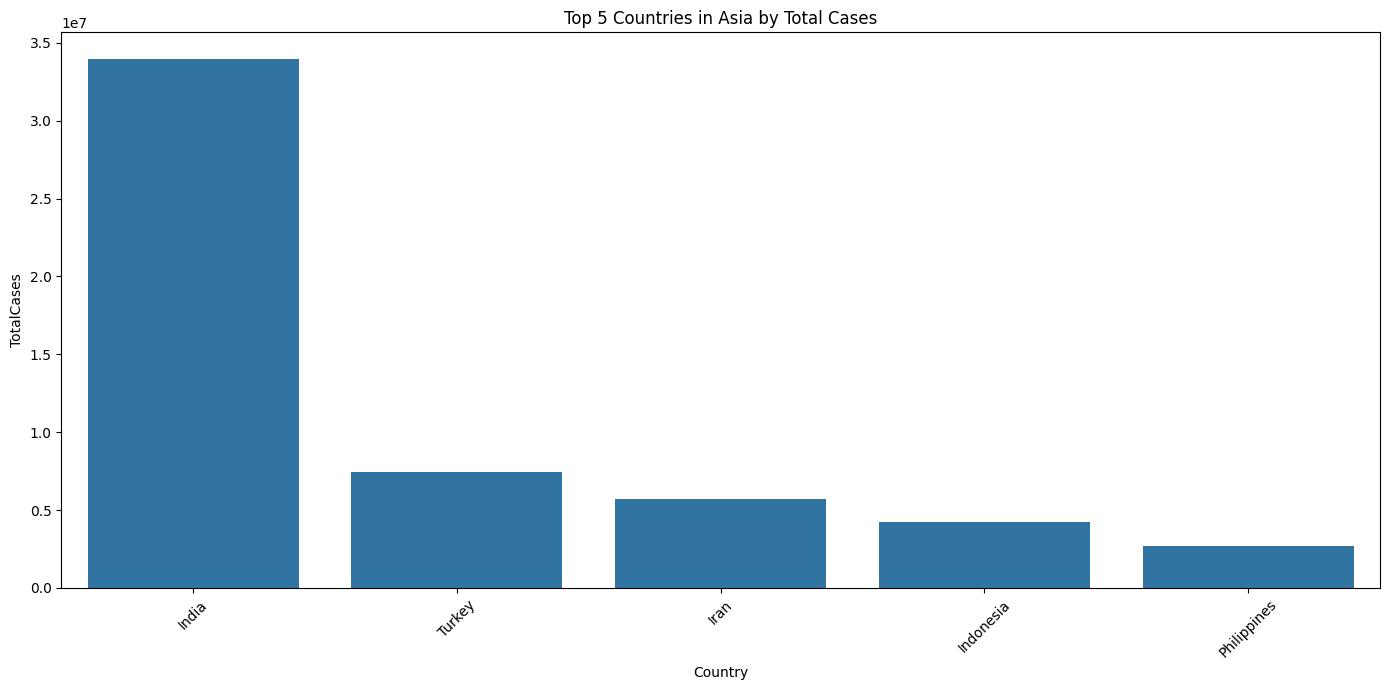

In [17]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalCases', data=top_countries_asia)
plt.title('Top 5 Countries in Asia by Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


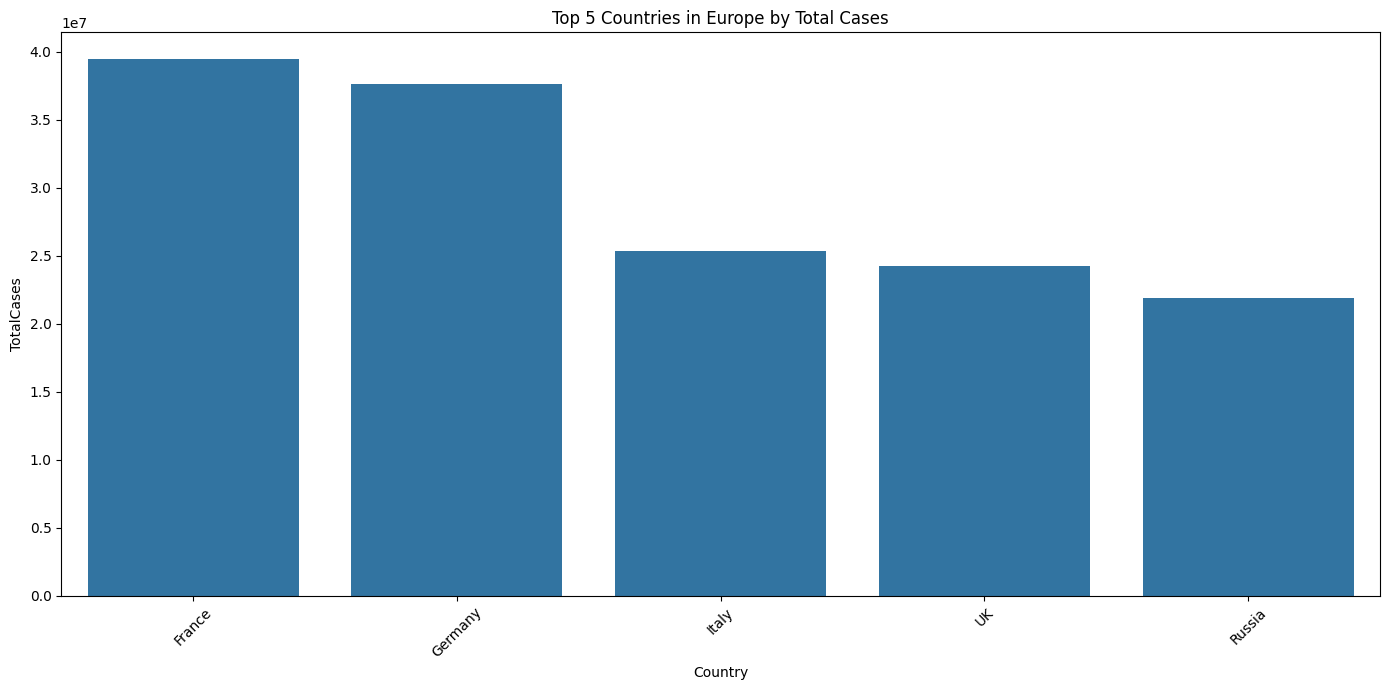

In [18]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalCases', data=top_countries_europe)
plt.title('Top 5 Countries in Europe by Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()